Make sure you remove `raise NotImplementedError()` and fill in any place that says `# YOUR CODE HERE`, as well as your `NAME`, `ID`, and `SECTION` below:

In [1]:
NAME = "SHAH FAIYAZ ZAMAN"
ID = "21301097"
SECTION = "05"

---

## Importing the necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from numpy.polynomial import Polynomial

In [3]:
P=Polynomial([1,2,3,4])

In [4]:
print(P.deriv(1))

2.0 + 6.0 x + 12.0 x**2


## Part 1: Polynomial Interpolation Using Newton's Divided Difference Form
---


### Newton's Divided Difference Form

Newton form of a $n$ degree polynomial:

$$p_n(x) = \sum_{k=0}^{n} a_kn_k(x),$$
where the basis is:
$$n_k(x) = \prod_{j=0}^{k-1}(x-x_j),$$
$$ n_0(x)=1,$$

and the coefficients are: $$a_k = f[x_0, x_1, ..., x_k],$$

where the notation $f[x_0, x_1,\dots,x_k]$ denotes the divided difference.

By expanding the Newton form, we get:

$$p(x) = f [x_0] + (x-x_0) f[x_0,x_1] + (x-x_0) (x-x_1) f[x_0,x_1,x_2] + \dots + (x-x_0) (x-x_1) \dots (x-x_{k-1}) f[x_0, x_1, \dots, x_k]$$

## Task 1 - 2+2 Marks
1. Complete the `calc_div_diff(x,y)` function which takes input `x` and `y`, and calculates all the divided differences. You may use the lambda function `difference()` inside the `calc_div_diff(x,y)` function to calculate the divided differences.

2. Complete the `__call__()` function which takes an input `x`, and calculates `y` using all the difference coefficients. `x` can be a single value or a numpy. In this case, it is a numpy array.

`res` variable must contain all results (corresponding y for x).

In [14]:
# basic rule for calculating the difference, implanted in the lambda function.
# You may use it if you wish
difference = lambda y2, y1, x2, x1: (y2-y1)/(x2-x1)

def calc_div_diff(x,y):
    assert(len(x)==len(y))
    #write this function to calculate all the divided differences in the list 'b'
    n = len(x)
    b = np.zeros((n,n))  #initializing
    #----------------------------------------------
    # YOUR CODE HERE
    b[:,0]=y
    print(b)
  
    for j in range (1,n): #select column then traverse, no need to start from col 0 as we inserted values in prev line
                            

        for i in range(n-j): # number of rows required decrease as we go down column 0, so we decrease range
            b[i,j]=(b [i+1,j-1] - b[i, j-1] )/(x[j+i] -  x[i])  # for upper part, for f[x1]-f[x0] for example, we need the next rows' previous column value
                                                                # as such b[i+1, j-1] is selected ie i+1th row , j-1 col. For right part we use same row 
                                                                # but prev col value so b[i,j-1]

                                                                # for lower part, the left part is same as the row number of X_data so x[i]
                                                                # for righter one, we need to need to increase it as row and col both increases, so b[i+j]
                                # for more context for row 0, we need x1,x2 x3 as col increases, for row 1 we need x2,x3 as col increases, so i+j  

    #----------------------------------------------
   
    return b[0,:]

In [16]:
data_x = [-3.,-2.,-1.,0.,1.,3.,4.]
data_y = [-60.,-80.,6.,1.,45.,30.,16.]

test = calc_div_diff(data_x, data_y)

np.testing.assert_array_equal([-60.0,-20.0,53.0,-32.833333333333336,14.041666666666668,-3.465277777777778,0.7232142857142857], test)


[[-60.   0.   0.   0.   0.   0.   0.]
 [-80.   0.   0.   0.   0.   0.   0.]
 [  6.   0.   0.   0.   0.   0.   0.]
 [  1.   0.   0.   0.   0.   0.   0.]
 [ 45.   0.   0.   0.   0.   0.   0.]
 [ 30.   0.   0.   0.   0.   0.   0.]
 [ 16.   0.   0.   0.   0.   0.   0.]]


In [23]:
class Newtons_Divided_Differences:

    def __init__(self, differences, data_x):
        self.differences = differences
        self.data_x = data_x

    def n(self, k, x):

        result = 1
        #----------------------------------------------
        # YOUR CODE HERE
        for i in range(0,k):
            result*=(x-self.data_x[i]) # return nk= product of (1*(x-data[0])*(x-data[1])*(x-data[2])...........) based on value of k
        #----------------------------------------------
  
        return result

    def __call__(self, x):
        '''
        this function is for calculating y from given x using all the difference coefficients
        x can be a single value or a numpy
        the formula being used:
        f(x) = f [x0] + (x-x0) f[x0,x1] + (x-x0) (x-x1) f[x0,x1,x2] + . . . + (x-x0) (x-x1) . . . (x-xk-1) f[x0, x1, . . ., xk]

        work on this after implementing 'calc_div_diff'. Then you should have
        f[x0], f[x0,x1]. . . . . ., f[x0, x1, . . ., xk] stored in self.differences

        'res' variable must return all the results (corresponding y for x)
        '''

        res = 0 #Initialization to avoid runtime error. You can change this line if you wish

        #----------------------------------------------
        for k in range(len(self.differences)): #need to traverse all differences instead of self.x
            res+=self.differences[k]*self.n(k,x)
        
        #----------------------------------------------

        return res


### Plotting the polynomial
* `data_x` and `data_y` are the coordinates of the given nodes.

* `differences` is a list which contains the divided differences as each of its elements: $f[x_0], f[x_0,x_1], f[x_0,x_1,x_2], \dots$

* `obj` is an object of type `Newtons_Divided_Differences`. Creating the object runs the constructor of the class where the `difference` are stored in `self.differences`.

* `X` contains $x_i$ values through which we want to plot our polynomial.

* Calling the object using `obj(X)` executes the `__call__()` function of the class, which returns a numpy array containing the corresponding $y_i$ values, and storing them in variable `F`.

* Using `plt.plot(X,F)`, we plot the $(x_i, y_i)$ pairs of the polynomial.

[[-30.   0.   0.   0.   0.   0.   0.]
 [-50.   0.   0.   0.   0.   0.   0.]
 [ 36.   0.   0.   0.   0.   0.   0.]
 [ 31.   0.   0.   0.   0.   0.   0.]
 [ 75.   0.   0.   0.   0.   0.   0.]
 [ 60.   0.   0.   0.   0.   0.   0.]
 [ 46.   0.   0.   0.   0.   0.   0.]]
[ 1.91596033e+04  1.31559256e+04  8.56170186e+03  5.12699700e+03
  2.63391150e+03  8.93915843e+02 -2.54706325e+02 -9.49306214e+02
 -1.30520928e+03 -1.41794588e+03 -1.36537320e+03 -1.20968853e+03
 -9.99333725e+02 -7.70791092e+02 -5.50270437e+02 -3.55287482e+02
 -1.96133541e+02 -7.72364950e+01  1.58695188e+00  4.39877195e+01
  5.60495129e+01  4.53626937e+01  2.02068613e+01 -1.11578542e+01
 -4.10907896e+01 -6.30620348e+01 -7.20350085e+01 -6.47403240e+01
 -3.98409435e+01  2.01137807e+00  5.82283589e+01  1.24446168e+02
  1.94795113e+02  2.62278038e+02  3.19257433e+02  3.58051252e+02
  3.71637446e+02  3.54467202e+02  3.03386893e+02  2.18668743e+02
  1.05150197e+02 -2.65179947e+01 -1.58514983e+02 -2.64384316e+02
 -3.07459722e+02 -

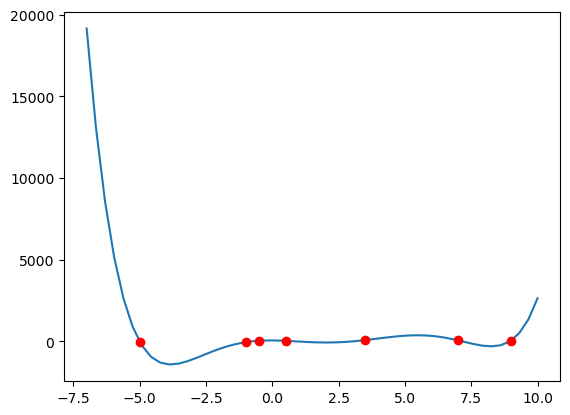

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data_x = np.array([-5.,-1,-0.5,0.5,3.5,7.,9])
data_y = np.array([-30., -50., 36., 31., 75., 60., 46.])
differences = calc_div_diff(list(data_x), list(data_y))
p = Newtons_Divided_Differences(list(differences),data_x)
test_x = np.linspace(-7, 10, 50, endpoint=True)
test_y = p(test_x)
print(test_y)

#generating 50 points from -3 to 4 in order to create a smooth line
plt.plot(test_x, test_y)
plt.plot(data_x, data_y, 'ro')
plt.show()


# Daily Evaluation - 4 marks


### Suppose, you have three nodes (−1.5, 3.75 ), ( 0.5, 1.22 ), ( 1.67, 2.9 ). Using Newton's Divided Difference method, print out the value of the interpolating polynomial at x = 0.25.

### You have to solve the problem using Newtons_Divided_Differences class.


In [9]:
import numpy as np


data_x = np.array([-1.5,0.5,1.67])
data_y = np.array([3.75, 1.22, 2.9])
differences = calc_div_diff(list(data_x), list(data_y))
p = Newtons_Divided_Differences(list(differences),data_x)
print(p(0.25))

[[3.75 0.   0.  ]
 [1.22 0.   0.  ]
 [2.9  0.   0.  ]]
1.1634920731214105
